# Object Detection with YOLOv8

Installing Roboflow and Ultralytics

In [ ]:
!pip install roboflow
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.1/800.1 kB 5.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
 

Downloading the Dataset

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="qJ1dCx1Mt9ObCFSuMNTB")
project = rf.workspace("proj-sfl83").project("grasp-6")
version = project.version(7)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.54, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to grasp-6-7 in yolov8:: 100%|██████████| 6184/6184 [00:01<00:00, 5745.91it/s]


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 24.5MB/s]


Fine-Tuning on Custom Dataset

In [ ]:
results = model.train(
    data='/content/grasp-6-7/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    project='runs/train',
    name='exp',
    plots=True,
    exist_ok=True
)

# Save the trained model
model.save('/content/best_yolov8.pt')


Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/grasp-6-7/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/train, name=exp, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

100%|██████████| 755k/755k [00:00<00:00, 4.08MB/s]


Overriding model.yaml nc=80 with nc=19

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


AMP: checks passed ✅


train: Scanning /content/grasp-6-7/train/labels... 2517 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2517/2517 [00:01<00:00, 1719.45it/s]


train: New cache created: /content/grasp-6-7/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 8697, len(boxes) = 8784. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/grasp-6-7/valid/labels... 212 images, 0 backgrounds, 0 corrupt: 100%|██████████| 212/212 [00:00<00:00, 872.31it/s] 

val: New cache created: /content/grasp-6-7/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 579, len(boxes) = 620. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/train/exp/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000435, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/exp
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.58G      1.001      3.204      1.212         33        640: 100%|██████████| 158/158 [01:02<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.51it/s]

                   all        212        620      0.416      0.491      0.449      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       2.4G     0.9819      1.937       1.21         44        640: 100%|██████████| 158/158 [00:58<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]

                   all        212        620      0.618      0.566      0.635      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.38G     0.9405      1.591      1.186         17        640: 100%|██████████| 158/158 [00:56<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]

                   all        212        620      0.744      0.656      0.747       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.38G     0.9214      1.436      1.161         21        640: 100%|██████████| 158/158 [00:56<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        212        620      0.647      0.729      0.715      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.37G     0.8919      1.303      1.148         40        640: 100%|██████████| 158/158 [00:57<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        212        620      0.742      0.661      0.763      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.39G     0.8568      1.183      1.121         22        640: 100%|██████████| 158/158 [00:55<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]

                   all        212        620      0.792      0.823      0.859      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.37G     0.8417      1.128      1.108         51        640: 100%|██████████| 158/158 [00:56<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]

                   all        212        620       0.83      0.763      0.842      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.39G     0.8379      1.061      1.114         27        640: 100%|██████████| 158/158 [00:56<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        212        620      0.774      0.813      0.887      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.22G     0.8203      1.018        1.1         32        640: 100%|██████████| 158/158 [00:57<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]

                   all        212        620      0.832      0.829       0.89      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.39G     0.8094      0.962      1.096         33        640: 100%|██████████| 158/158 [00:57<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]

                   all        212        620       0.82      0.881      0.877      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.38G     0.7998      0.921      1.086         22        640: 100%|██████████| 158/158 [00:56<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]

                   all        212        620      0.853      0.855      0.898      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.39G     0.7735     0.8835      1.071         22        640: 100%|██████████| 158/158 [00:58<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        212        620      0.827      0.865      0.895      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.39G     0.7763     0.8712      1.077         39        640: 100%|██████████| 158/158 [00:55<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]

                   all        212        620      0.884      0.821      0.892      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.39G     0.7775     0.8392      1.077         36        640: 100%|██████████| 158/158 [00:57<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]

                   all        212        620      0.828      0.866      0.892      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.37G     0.7519     0.8022      1.057         37        640: 100%|██████████| 158/158 [00:56<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]

                   all        212        620      0.858      0.905      0.913      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.22G     0.7481     0.7866      1.057         26        640: 100%|██████████| 158/158 [00:57<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]

                   all        212        620      0.855      0.836      0.899       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.37G      0.753     0.7873      1.064         48        640: 100%|██████████| 158/158 [00:57<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]


                   all        212        620      0.882      0.847      0.905       0.77

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.24G     0.7298     0.7483      1.044         28        640: 100%|██████████| 158/158 [00:55<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        212        620      0.845      0.862      0.932      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.36G     0.7332      0.744       1.05         19        640: 100%|██████████| 158/158 [00:56<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]

                   all        212        620      0.883      0.877      0.928      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.39G     0.7188     0.7313      1.042         32        640: 100%|██████████| 158/158 [00:55<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]

                   all        212        620      0.859      0.863      0.911      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.37G     0.7134     0.6979      1.037         27        640: 100%|██████████| 158/158 [00:56<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        212        620      0.891      0.878      0.928      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.39G     0.7142     0.6917      1.041         16        640: 100%|██████████| 158/158 [00:56<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]

                   all        212        620      0.848      0.918      0.926      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.23G     0.7048     0.6824      1.037         26        640: 100%|██████████| 158/158 [00:56<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]


                   all        212        620       0.89      0.857      0.918      0.781

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.38G     0.7038      0.676      1.035         41        640: 100%|██████████| 158/158 [00:58<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.63it/s]

                   all        212        620      0.856      0.864      0.919       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.21G     0.6935     0.6683      1.033         51        640: 100%|██████████| 158/158 [00:59<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]

                   all        212        620      0.861      0.874      0.924      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.39G     0.6816     0.6415       1.02         29        640: 100%|██████████| 158/158 [00:56<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]

                   all        212        620      0.904      0.805       0.91      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.37G       0.68      0.641      1.026         28        640: 100%|██████████| 158/158 [00:59<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]

                   all        212        620      0.893      0.803      0.909      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.23G      0.673     0.6187      1.018         48        640: 100%|██████████| 158/158 [00:59<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        212        620      0.836      0.862      0.901      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.23G      0.675     0.6359      1.019         51        640: 100%|██████████| 158/158 [00:57<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]


                   all        212        620        0.9      0.848      0.916      0.798

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.39G     0.6721     0.6161      1.015         36        640: 100%|██████████| 158/158 [00:56<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]

                   all        212        620      0.857      0.856       0.92      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.36G     0.6633     0.6059      1.017         16        640: 100%|██████████| 158/158 [00:56<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        212        620      0.834      0.874      0.926      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.37G     0.6623     0.6031      1.013         32        640: 100%|██████████| 158/158 [00:59<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.67it/s]

                   all        212        620      0.885      0.842      0.915      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.37G     0.6574     0.5883      1.011         40        640: 100%|██████████| 158/158 [00:57<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]

                   all        212        620      0.882      0.885      0.907      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.37G     0.6499     0.5805      1.007         28        640: 100%|██████████| 158/158 [00:57<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        212        620      0.888      0.867       0.92      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.37G     0.6523      0.587      1.012         23        640: 100%|██████████| 158/158 [00:58<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]

                   all        212        620      0.882       0.86      0.919      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.22G     0.6448     0.5686      1.004         30        640: 100%|██████████| 158/158 [00:59<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]

                   all        212        620      0.892      0.868       0.93      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.38G     0.6454     0.5666      1.005         41        640: 100%|██████████| 158/158 [00:57<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]

                   all        212        620      0.877       0.87       0.93       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.39G     0.6387     0.5567     0.9988         18        640: 100%|██████████| 158/158 [00:57<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]

                   all        212        620      0.859      0.876      0.918      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.36G     0.6311     0.5474     0.9977         25        640: 100%|██████████| 158/158 [00:58<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        212        620      0.897       0.88      0.936      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.37G     0.6306     0.5456     0.9963         23        640: 100%|██████████| 158/158 [00:59<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        212        620      0.875      0.875      0.928       0.82


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.48G     0.5146     0.4333     0.9297         14        640: 100%|██████████| 158/158 [01:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]

                   all        212        620      0.898      0.878      0.936       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.39G      0.511     0.4141     0.9277         17        640: 100%|██████████| 158/158 [00:58<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        212        620       0.89      0.876      0.928      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.37G     0.5038      0.407     0.9241         14        640: 100%|██████████| 158/158 [00:58<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]

                   all        212        620      0.867      0.882       0.93      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.37G     0.4969     0.3953     0.9224         33        640: 100%|██████████| 158/158 [00:55<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        212        620      0.885      0.868      0.932       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.37G     0.4909     0.3918     0.9172         28        640: 100%|██████████| 158/158 [00:55<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]

                   all        212        620      0.835      0.889      0.912      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.37G     0.4896     0.3828     0.9174         20        640: 100%|██████████| 158/158 [00:54<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]

                   all        212        620      0.915      0.861       0.93      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.37G     0.4785     0.3766     0.9106         13        640: 100%|██████████| 158/158 [00:54<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        212        620      0.898      0.874       0.93      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.38G     0.4765     0.3705     0.9076         21        640: 100%|██████████| 158/158 [00:57<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]

                   all        212        620      0.891      0.877       0.93      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.37G     0.4732     0.3693     0.9078         20        640: 100%|██████████| 158/158 [00:57<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        212        620      0.885      0.882      0.932      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.37G     0.4715      0.365     0.9097         26        640: 100%|██████████| 158/158 [00:54<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


                   all        212        620      0.885      0.884      0.932      0.828

50 epochs completed in 0.853 hours.
Optimizer stripped from runs/train/exp/weights/last.pt, 6.3MB
Optimizer stripped from runs/train/exp/weights/best.pt, 6.3MB

Validating runs/train/exp/weights/best.pt...
Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3009353 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


                   all        212        620      0.898      0.878      0.936      0.828
                banana         36         72          1      0.952      0.986       0.93
               biscuit          5          8      0.804          1      0.995      0.811
                  cake          5          8      0.616          1      0.995      0.937
           cup-laying-          4          8      0.835      0.875      0.869      0.808
         cup-standing-          5          8      0.884      0.955      0.982      0.904
                  fork          6         12          1      0.831      0.995      0.825
         juice-laying-          7         13      0.984          1      0.995      0.911
       juice-standing-         14         31      0.985          1      0.995      0.902
                 knife          3          5       0.94        0.8      0.962      0.812
                  logo         37         37      0.858      0.819      0.874      0.761
               nescaf

Downloading Custom Test Dataset from Google Drive

In [ ]:
import os
import gdown
import zipfile

# Replace with your Google Drive folder ID
folder_id = '1SqaaIhOIhu4e9ukL2Y3T_daFFT64Eju2'

# Use gdown to download the entire folder as a zip file
gdown.download_folder(f"https://drive.google.com/drive/folders/{folder_id}", quiet=False, use_cookies=False)


In [ ]:
# Alternatively, predict on a batch of images and save all
images = [
    "/content/test images/IMG_1246.JPG",
    "/content/test images/IMG_3243.JPG",
    "/content/test images/IMG_E1397.JPG",
    "/content/test images/WIN_20230917_13_32_27_Pro.jpg"
]

In [ ]:

results = model.predict(images)  # 'path/to/your/images' is a directory


0: 640x640 3 juice-laying-s, 1 logo, 5.4ms
1: 640x640 2 spoons, 5.4ms
2: 640x640 2 cakes, 5.4ms
3: 640x640 2 bananas, 2 tangerines, 5.4ms
Speed: 3.8ms preprocess, 5.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Saving the Result

In [ ]:
import torch
box_list = [result.boxes.xyxy for result in results]
torch.save(box_list, 'box_list.pt')

# Object Segmentation with FastSAM

Installing FastSAM from github

In [ ]:
!git clone https://github.com/CASIA-IVA-Lab/FastSAM.git
!pip -q install -r FastSAM/requirements.txt
!pip -q install git+https://github.com/openai/CLIP.git roboflow supervision

!pip -q install git+https://github.com/facebookresearch/segment-anything.git
!wget -P FastSAM/weights https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt
!wget -P FastSAM/weights https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

Cloning into 'FastSAM'...
remote: Enumerating objects: 1329, done.
remote: Counting objects: 100% (494/494), done.
remote: Compressing objects: 100% (155/155), done.
remote: Total 1329 (delta 377), reused 399 (delta 338), pack-reused 835
Receiving objects: 100% (1329/1329), 72.57 MiB | 20.84 MiB/s, done.
Resolving deltas: 100% (530/530), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
HOME = '/content'

In [ ]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt
!wget -P {HOME}/weights -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
!ls -lh {HOME}/weights

total 2.6G
-rw-r--r-- 1 root root 139M Jun 20  2023 FastSAM.pt
-rw-r--r-- 1 root root 2.4G Apr  4  2023 sam_vit_h_4b8939.pth


In [ ]:
FAST_SAM_CHECKPOINT_PATH = f"{HOME}/weights/FastSAM.pt"
SAM_SAM_CHECKPOINT_PATH = f"{HOME}/weights/sam_vit_h_4b8939.pth"

In [ ]:
%cd {HOME}/FastSAM

import os
import cv2
import torch
import roboflow
import base64

import supervision as sv
import numpy as np

from roboflow import Roboflow
from fastsam import FastSAM, FastSAMPrompt
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

/content/FastSAM


In [ ]:
DEVICE = 'cuda'

In [ ]:
IMAGE_PATH = f"{HOME}/data/dog.jpeg"

In [ ]:
os.makedirs(f"{HOME}/output", exist_ok=True)

In [ ]:
fast_sam = FastSAM(FAST_SAM_CHECKPOINT_PATH)

Helper Functions

In [ ]:
# Convert masks to boolean (True/False)
def masks_to_bool(masks):
    if type(masks) == np.ndarray:
        return masks.astype(bool)
    return masks.cpu().numpy().astype(bool)

def annotate_image(image_path: str, masks: np.ndarray) -> np.ndarray:
    image = cv2.imread(image_path)

    xyxy = sv.mask_to_xyxy(masks=masks)
    detections = sv.Detections(xyxy=xyxy, mask=masks)

    mask_annotator = sv.MaskAnnotator(color_lookup = sv.ColorLookup.INDEX)
    return mask_annotator.annotate(scene=image.copy(), detections=detections)

In [ ]:
# helper function that loads an image before adding it to the widget

def encode_image(filepath):
    with open(filepath, 'rb') as f:
        image_bytes = f.read()
    encoded = str(base64.b64encode(image_bytes), 'utf-8')
    return "data:image/jpg;base64,"+encoded

In [ ]:
!pip -q install supervision jupyter_bbox_widget

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.8 MB/s eta 0:00:00


Loading bounding boxes from the previous part

In [ ]:
box_list = torch.load('box_list.pt')

In [ ]:
import os
import gdown
import zipfile

# Replace with your Google Drive folder ID
folder_id = '1SqaaIhOIhu4e9ukL2Y3T_daFFT64Eju2'

# Use gdown to download the entire folder as a zip file
gdown.download_folder(f"https://drive.google.com/drive/folders/{folder_id}", quiet=False, use_cookies=False)


Retrieving folder contents


Processing file 1wdCsUf4gyIqkLUAGAftrP0QOJ-e8BQNN IMG_1246.JPG
Processing file 1CTUS_gYuvbQ6vqi023HFNy1vKkF-1IC4 IMG_3025.JPG
Processing file 1eQ84WT0aXuTyfjZOyOkQCjLtVc2LVzJ1 IMG_3236.JPG
Processing file 1xqlSYNuOoVp13i5RrYxNbGmQUe0s-eYa IMG_3243.JPG
Processing file 1uvzFASiBt1ej7RiIU3IDlwcKrDQ8HFtC IMG_E1342.JPG
Processing file 1MFt0uLlaLmxT90PvPpiBBPv37RfiSgX4 IMG_E1367.JPG
Processing file 1Gwg_RxYB1hRLVpzGvgIItcp6yhGbw-zq IMG_E1370.JPG
Processing file 18BTClrMPxd-4WW4gvroepJs6ZrPL0n7L IMG_E1392.JPG
Processing file 1xLgmq-drp92YBKAX1jojtVIGKORXCpn0 IMG_E1397.JPG
Processing file 1EmemRp12B4csFi1x6mCAN0AY1Ucv4MbB WIN_20230917_13_32_27_Pro.jpg


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1wdCsUf4gyIqkLUAGAftrP0QOJ-e8BQNN
To: /content/test images/IMG_1246.JPG
100%|██████████| 4.26M/4.26M [00:00<00:00, 35.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CTUS_gYuvbQ6vqi023HFNy1vKkF-1IC4
To: /content/test images/IMG_3025.JPG
100%|██████████| 6.06M/6.06M [00:00<00:00, 85.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1eQ84WT0aXuTyfjZOyOkQCjLtVc2LVzJ1
To: /content/test images/IMG_3236.JPG
100%|██████████| 6.66M/6.66M [00:00<00:00, 41.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xqlSYNuOoVp13i5RrYxNbGmQUe0s-eYa
To: /content/test images/IMG_3243.JPG
100%|██████████| 6.64M/6.64M [00:00<00:00, 40.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1uvzFASiBt1ej7RiIU3IDlwcKrDQ8HFtC
To: /content/test images/IMG_E1342.JPG
100%|██████████| 2.90M/2.90M [00:00<00:00, 177MB/s]
Downloadin

['/content/test images/IMG_1246.JPG',
 '/content/test images/IMG_3025.JPG',
 '/content/test images/IMG_3236.JPG',
 '/content/test images/IMG_3243.JPG',
 '/content/test images/IMG_E1342.JPG',
 '/content/test images/IMG_E1367.JPG',
 '/content/test images/IMG_E1370.JPG',
 '/content/test images/IMG_E1392.JPG',
 '/content/test images/IMG_E1397.JPG',
 '/content/test images/WIN_20230917_13_32_27_Pro.jpg']

Image Segmentation on images using box prompt


image 1/1 /content/test images/WIN_20230917_13_32_27_Pro.jpg: 576x1024 5 objects, 144.2ms
Speed: 4.5ms preprocess, 144.2ms inference, 31.7ms postprocess per image at shape (1, 3, 1024, 1024)


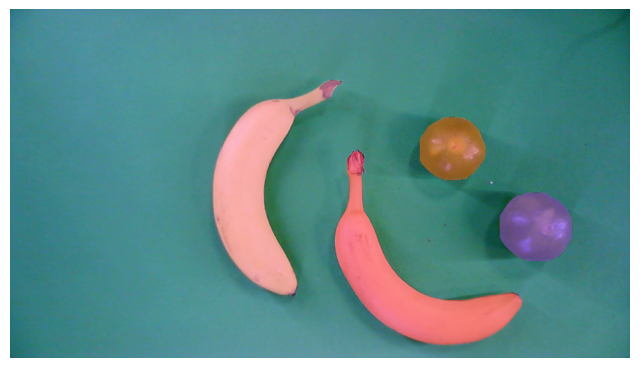

In [ ]:
import numpy as np
for i in range(len(images)):

  IMAGE_PATH = images[i]
  boxes = box_list[i]
  results = fast_sam(
      source=IMAGE_PATH,
      device=DEVICE,
      retina_masks=True,
      imgsz=1024,
      conf=0.5,
      iou=0.6)
  prompt_process = FastSAMPrompt(IMAGE_PATH, results, device=DEVICE)
  masks = []
  for box in boxes:
    mask = prompt_process.box_prompt(bbox=box)
    masks.append(mask)

  masks = np.concatenate(masks, axis=0)
  masks = masks_to_bool(masks)
  annotated_image=annotate_image(image_path=IMAGE_PATH, masks=masks)
  sv.plot_image(image=annotated_image, size=(8, 8))
